In [1]:
from datetime import datetime
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
pd.options.display.max_columns=40

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/Users/elaiken3/Desktop/catalyst_2/btc_hourly_price_data_1.csv', parse_dates=['Timestamp'])

In [3]:
df.head()

Timestamp    Open    High     Low   Close  Volume (BTC)  \
0 2015-12-31 00:00:00  426.09  427.00  424.48  424.58        177.15   
1 2015-12-31 01:00:00  425.96  426.64  424.02  425.77        153.87   
2 2015-12-31 02:00:00  425.77  426.67  424.02  425.59         63.84   
3 2015-12-31 03:00:00  424.81  426.40  424.32  425.99         91.63   
4 2015-12-31 04:00:00  425.99  425.99  424.42  425.98         21.06   

   Volume (Currency)  Weighted Price  
0           75412.71          425.69  
1           65495.29          425.66  
2           27143.22          425.19  
3           38933.15          424.87  
4            8965.36          425.63

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17632 entries, 0 to 17631
Data columns (total 8 columns):
Timestamp            17632 non-null datetime64[ns]
Open                 17632 non-null float64
High                 17632 non-null float64
Low                  17632 non-null float64
Close                17632 non-null float64
Volume (BTC)         17632 non-null float64
Volume (Currency)    17632 non-null float64
Weighted Price       17632 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.1 MB


In [5]:
df['Weekday_name']= df['Timestamp'].dt.weekday_name

In [6]:
df.head()

Timestamp    Open    High     Low   Close  Volume (BTC)  \
0 2015-12-31 00:00:00  426.09  427.00  424.48  424.58        177.15   
1 2015-12-31 01:00:00  425.96  426.64  424.02  425.77        153.87   
2 2015-12-31 02:00:00  425.77  426.67  424.02  425.59         63.84   
3 2015-12-31 03:00:00  424.81  426.40  424.32  425.99         91.63   
4 2015-12-31 04:00:00  425.99  425.99  424.42  425.98         21.06   

   Volume (Currency)  Weighted Price Weekday_name  
0           75412.71          425.69     Thursday  
1           65495.29          425.66     Thursday  
2           27143.22          425.19     Thursday  
3           38933.15          424.87     Thursday  
4            8965.36          425.63     Thursday

/Users/elaiken3/anaconda2/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


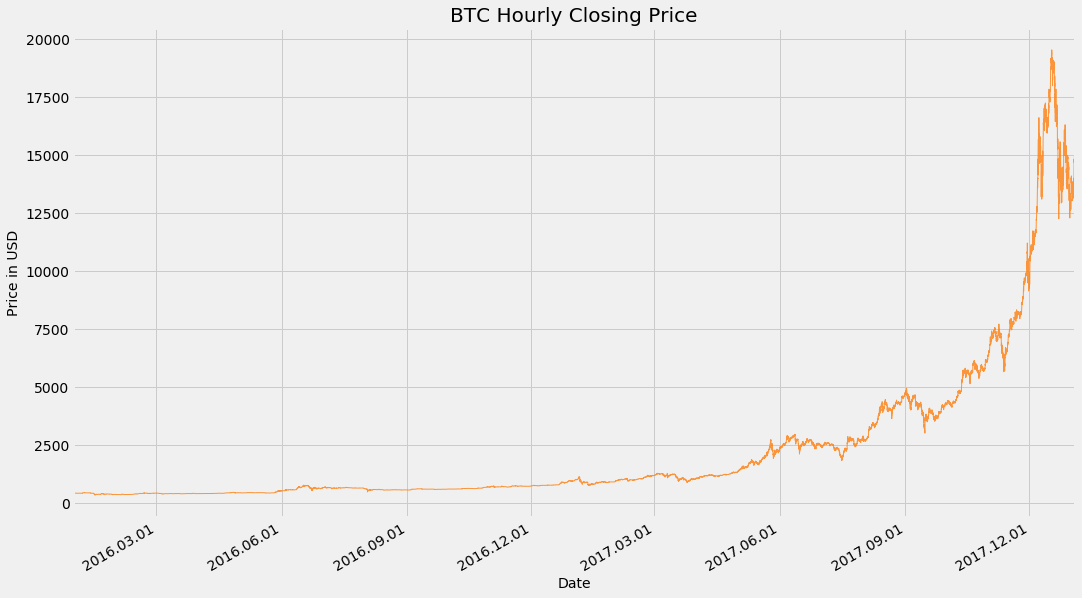

In [7]:
import matplotlib.dates as mdates
df['Date_mpl'] = df['Timestamp'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(16,10))
sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[1], ax=ax, linewidth=1)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.title("BTC Hourly Closing Price", fontsize=20)
plt.show()

In [8]:
df.describe()

Open          High           Low         Close  Volume (BTC)  \
count  17632.000000  17632.000000  17632.000000  17632.000000  17632.000000   
mean    2294.300177   2312.522013   2273.699087   2295.214579    381.643512   
std     3324.770190   3362.204366   3281.627981   3326.148203    482.879195   
min      354.410000    361.000000      1.500000    354.900000      0.310000   
25%      579.647500    581.227500    578.000000    579.657500    106.115000   
50%      887.970000    893.320000    882.575000    888.265000    233.750000   
75%     2575.007500   2589.955000   2558.922500   2575.520000    483.402500   
max    19546.880000  19666.000000  19400.660000  19546.880000  13693.230000   

       Volume (Currency)  Weighted Price       Date_mpl  
count       1.763200e+04    17632.000000   17632.000000  
mean        1.323459e+06     2293.558473  736330.312500  
std         3.278702e+06     3322.982578     212.086013  
min         1.849100e+02      356.710000  735963.000000  
25%         6.481378e+04      579.640000  736146.656250  
50%         2.092590e+05      888.115000  736330.312500  
75%         1.100181e+06     2572.910000  736513.968750  
max         7.739169e+07    19538.240000  736697.625000

/Users/elaiken3/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


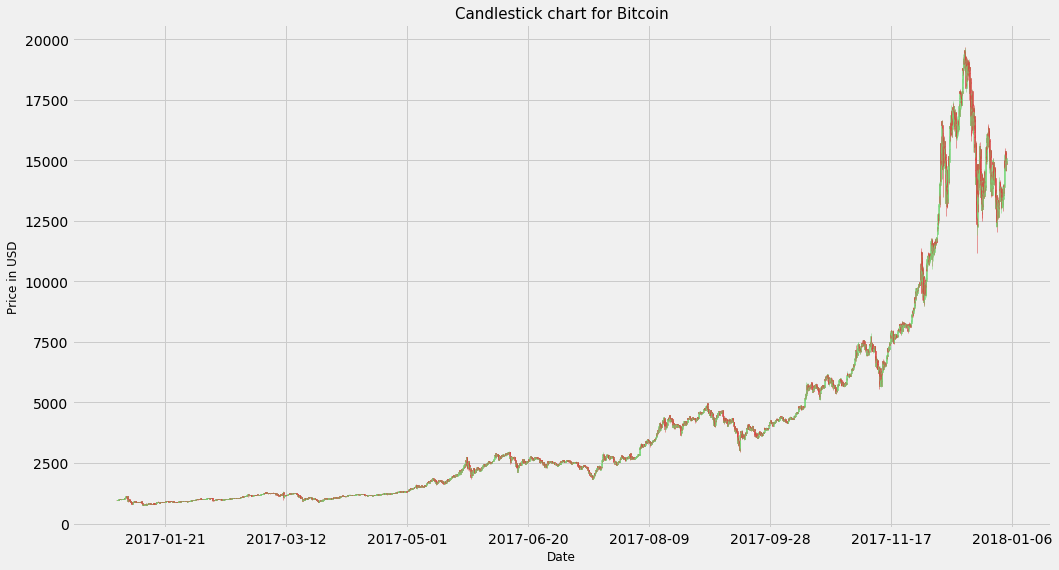

In [9]:
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot2grid((1,1), (0,0))

temp_df = df[df['Timestamp']>'2017-01-01']
ohlc = []
for ind, row in temp_df.iterrows():
    ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume (BTC)']]
    ohlc.append(ol)
    
candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

plt.xlabel("Date", fontsize=12)
plt.ylabel("Price in USD", fontsize=12)
plt.title("Candlestick chart for Bitcoin", fontsize=15)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

In [10]:
buy_btc = pd.read_csv('/Users/elaiken3/Desktop/catalyst_2/output_as_csv.csv', parse_dates=['Unnamed: 0'])

In [11]:
buy_btc

Unnamed: 0  algo_volatility  algorithm_period_return     alpha  \
0   2016-01-01 23:59:00              NaN                 0.000000       NaN   
1   2016-01-02 23:59:00         0.000102                -0.000009 -0.003744   
2   2016-01-03 23:59:00         0.000442                -0.000061 -0.004572   
3   2016-01-04 23:59:00         0.000883                 0.000020 -0.001326   
4   2016-01-05 23:59:00         0.000831                -0.000021 -0.001258   
5   2016-01-06 23:59:00         0.001089                -0.000148 -0.005463   
6   2016-01-07 23:59:00         0.009113                 0.001337  0.007901   
7   2016-01-08 23:59:00         0.008868                 0.001041  0.000492   
8   2016-01-09 23:59:00         0.008665                 0.000697 -0.003084   
9   2016-01-10 23:59:00         0.008179                 0.000697 -0.006245   
10  2016-01-11 23:59:00         0.007770                 0.000680 -0.002158   
11  2016-01-12 23:59:00         0.011059                -0.001051 -0.028873   
12  2016-01-13 23:59:00         0.010589                -0.001163 -0.027945   
13  2016-01-14 23:59:00         0.010192                -0.001395 -0.025984   
14  2016-01-15 23:59:00         0.038303                -0.010514 -0.047240   
15  2016-01-16 23:59:00         0.041675                -0.006429 -0.029516   
16  2016-01-17 23:59:00         0.040411                -0.007394 -0.011987   
17  2016-01-18 23:59:00         0.039480                -0.006589 -0.036748   
18  2016-01-19 23:59:00         0.038555                -0.007986 -0.037728   
19  2016-01-20 23:59:00         0.046595                -0.000683 -0.015076   
20  2016-01-21 23:59:00         0.045753                -0.002314 -0.009019   
21  2016-01-22 23:59:00         0.048947                -0.008332 -0.038246   
22  2016-01-23 23:59:00         0.048028                -0.007372 -0.040118   
23  2016-01-24 23:59:00         0.048834                -0.003597 -0.017061   
24  2016-01-25 23:59:00         0.048507                -0.006321 -0.027351   
25  2016-01-26 23:59:00         0.047539                -0.006221 -0.029396   
26  2016-01-27 23:59:00         0.046742                -0.005340 -0.022544   
27  2016-01-28 23:59:00         0.047526                -0.009658 -0.036847   
28  2016-01-29 23:59:00         0.046671                -0.009880 -0.036014   
29  2016-01-30 23:59:00         0.045860                -0.010179 -0.039708   
..                  ...              ...                      ...       ...   
609 2017-09-01 23:59:00         0.711702                23.101949  0.241850   
610 2017-09-02 23:59:00         0.714075                20.815668  0.238866   
611 2017-09-03 23:59:00         0.713535                21.219391  0.236750   
612 2017-09-04 23:59:00         0.716707                18.815018  0.230184   
613 2017-09-05 23:59:00         0.716745                19.855326  0.231516   
614 2017-09-06 23:59:00         0.717154                21.208734  0.235457   
615 2017-09-07 23:59:00         0.716571                21.318543  0.234595   
616 2017-09-08 23:59:00         0.718368                19.413797  0.229054   
617 2017-09-09 23:59:00         0.717787                19.487011  0.228769   
618 2017-09-10 23:59:00         0.717471                18.980982  0.228094   
619 2017-09-11 23:59:00         0.716971                18.763358  0.226504   
620 2017-09-12 23:59:00         0.716521                18.458103  0.226061   
621 2017-09-13 23:59:00         0.718841                16.599883  0.216812   
622 2017-09-14 23:59:00         0.732060                12.784391  0.198875   
623 2017-09-15 23:59:00         0.742772                15.656709  0.208047   
624 2017-09-16 23:59:00         0.742212                15.559444  0.206704   
625 2017-09-17 23:59:00         0.741652                15.466391  0.204976   
626 2017-09-18 23:59:00         0.747382                18.077555  0.213694   
627 2017-09-19 23:59:00         0.748059                16.8743

In [87]:
buy_btc.describe()

algo_volatility  algorithm_period_return       alpha  \
count       638.000000               639.000000  638.000000   
mean          0.351881                 3.339988    0.157502   
std           0.221374                 5.428508    0.103684   
min           0.000102                -0.013388   -0.050294   
25%           0.139350                 0.169647    0.063629   
50%           0.304282                 0.611355    0.177906   
75%           0.542676                 3.159934    0.235940   
max           0.754073                23.101949    0.396894   

       benchmark_period_return  benchmark_volatility        beta          btc  \
count               639.000000            638.000000  638.000000   639.000000   
mean                  1.891027              0.501729    0.566552  1244.268025   
std                   2.551027              0.077874    0.372806  1097.526759   
min                  -0.166233              0.079686    0.001280   359.160000   
25%                   0.332719              0.458837    0.176776   572.470000   
50%                   0.709233              0.483561    0.488492   737.610000   
75%                   2.139061              0.513598    0.928365  1350.800000   
max                  10.393023              0.850764    1.164876  4907.700000   

       capital_used    ending_cash  ending_exposure  ending_value  \
count    639.000000     639.000000     6.390000e+02  6.390000e+02   
mean   -1246.200656 -130568.846239     5.645677e+05  5.645677e+05   
std     1100.469407  200115.662061     7.321845e+05  7.321845e+05   
min    -4918.007152 -696322.219031     0.000000e+00  0.000000e+00   
25%    -1353.636950 -230368.736302     9.239407e+04  9.239407e+04   
50%     -739.159129  -71547.589180     2.297601e+05  2.297601e+05   
75%     -573.672302   30792.154301     6.460203e+05  6.460203e+05   
max        0.000000  100000.000000     2.988789e+06  2.988789e+06   

       excess_return  gross_leverage  information  long_exposure  \
count     639.000000      639.000000   638.000000   6.390000e+02   
mean        3.319536        1.102072     0.005674   5.645677e+05   
std         5.427364        0.488818     0.079706   7.321845e+05   
min        -0.032788        0.000000    -1.607645   0.000000e+00   
25%         0.152697        0.750041    -0.024777   9.239407e+04   
50%         0.587955        1.321374     0.000979   2.297601e+05   
75%         3.137534        1.460082     0.050907   6.460203e+05   
max        23.080349        1.853959     0.219390   2.988789e+06   

         long_value  longs_count  max_drawdown  max_leverage  net_leverage  \
count  6.390000e+02   639.000000    639.000000         639.0    639.000000   
mean   5.645677e+05     0.998435     -0.263115           0.0      1.102072   
std    7.321845e+05     0.039559      0.170367           0.0      0.488818   
min    0.000000e+00     0.000000     -0.453729           0.0      0.000000   
25%    9.239407e+04     1.000000     -0.434204           0.0      0.750041   
50%    2.297601e+05     1.000000     -0.255033           0.0      1.321374   
75%    6.460203e+05     1.000000     -0.040787           0.0      1.460082   
max    2.988789e+06     1.000000      0.000000           0.0      1.853959   

                 pnl  portfolio_value     returns      sharpe  short_exposure  \
count     639.000000     6.390000e+02  639.000000  638.000000           639.0   
mean     3114.065072     4.339988e+05    0.005876    1.276438             0.0   
std     47087.223446     5.428508e+05    0.047453    1.216032             0.0   
min   -381549.194777     9.866119e+04   -0.216791  -11.634105             0.0   
25%     -1180.048021     1.169647e+05   -0.006769    0.987614             0.0   
50%       200.151707     1.611355e+05    0.001640    1.485713             0.0   
75%      4933.336138     4.159934e+05    0.018732    1.914855             0.0   
max    345604.482717     2.410195e+06    0.405406    5.282305             0.0   

       short_value  shorts_count     sort

In [12]:
buy_btc.isnull().sum()

Unnamed: 0                 0
algo_volatility            1
algorithm_period_return    0
alpha                      1
benchmark_period_return    0
benchmark_volatility       1
beta                       1
btc                        0
capital_used               0
ending_cash                0
ending_exposure            0
ending_value               0
excess_return              0
gross_leverage             0
information                1
long_exposure              0
long_value                 0
longs_count                0
max_drawdown               0
max_leverage               0
net_leverage               0
orders                     0
period_close               0
period_label               0
period_open                0
pnl                        0
portfolio_value            0
positions                  0
returns                    0
sharpe                     1
short_exposure             0
short_value                0
shorts_count               0
sortino                    1
starting_cash 

In [13]:
buy_btc.fillna(0, inplace=True)

In [14]:
buy_btc.isnull().sum()

Unnamed: 0                 0
algo_volatility            0
algorithm_period_return    0
alpha                      0
benchmark_period_return    0
benchmark_volatility       0
beta                       0
btc                        0
capital_used               0
ending_cash                0
ending_exposure            0
ending_value               0
excess_return              0
gross_leverage             0
information                0
long_exposure              0
long_value                 0
longs_count                0
max_drawdown               0
max_leverage               0
net_leverage               0
orders                     0
period_close               0
period_label               0
period_open                0
pnl                        0
portfolio_value            0
positions                  0
returns                    0
sharpe                     0
short_exposure             0
short_value                0
shorts_count               0
sortino                    0
starting_cash 

In [15]:
buy_btc = buy_btc.drop(['short_exposure', 'short_value', 'shorts_count', 'max_leverage'], axis=1)
buy_btc['DateStamp'] = buy_btc['Unnamed: 0']

In [16]:
buy_btc.corr()

algo_volatility  algorithm_period_return     alpha  \
algo_volatility                 1.000000                 0.793595  0.745084   
algorithm_period_return         0.793595                 1.000000  0.503899   
alpha                           0.745084                 0.503899  1.000000   
benchmark_period_return         0.849422                 0.994176  0.577424   
benchmark_volatility            0.024649                 0.259632 -0.247695   
beta                            0.996188                 0.771694  0.760786   
btc                             0.849148                 0.994280  0.577586   
capital_used                   -0.849638                -0.994085 -0.578190   
ending_cash                    -0.944023                -0.926795 -0.650498   
ending_exposure                 0.846395                 0.994718  0.551387   
ending_value                    0.846395                 0.994718  0.551387   
excess_return                   0.793426                 1.000000  0.503676   
gross_leverage                  0.786352                 0.325619  0.696844   
information                     0.409878                 0.419111  0.275829   
long_exposure                   0.846395                 0.994718  0.551387   
long_value                      0.846395                 0.994718  0.551387   
longs_count                     0.062806                 0.024378  0.060032   
max_drawdown                   -0.953456                -0.620364 -0.719127   
net_leverage                    0.786352                 0.325619  0.696844   
pnl                             0.082916                 0.124208  0.076186   
portfolio_value                 0.793595                 1.000000  0.503899   
returns                         0.088638                 0.093283  0.142674   
sharpe                          0.510546                 0.350967  0.677701   
sortino                         0.219994                 0.187887  0.397906   
starting_cash                  -0.944315                -0.926197 -0.650739   
starting_exposure               0.845527                 0.991971  0.549348   
starting_value                  0.845527                 0.991971  0.549348   
trading_days                    0.983696                 0.769968  0.777568   
treasury_period_return          0.554857                 0.348647  0.544235   

                         benchmark_period_return  benchmark_volatility  \
algo_volatility                         0.849422              0.024649   
algorithm_period_return                 0.994176              0.259632   
alpha                                   0.577424             -0.247695   
benchmark_period_return                 1.000000              0.217306   
benchmark_volatility                    0.217306              1.000000   
beta                                    0.831528              0.005011   
btc                                     0.999964              0.217496   
capital_used                           -0.999841             -0.221234   
ending_cash                            -0.956120             -0.128881   
ending_exposure                         0.998415              0.227719   
ending_value                            0.998415              0.227719   
excess_return                           0.994143              0.259763   
gross_leverage                          0.407962             -0.335009   
information                             0.428445              0.435017   
long_exposure                           0.998415              0.227719   
long_value                              0.998415              0.227719   
longs_count                             0.029190              0.247162   
max_drawdown                           -0.690800              0.088678   
net_leverage                            0.407962             -0.335009   
pnl                                     0.119083              0.024478   
portfolio_value                         0.994176              0.259632   
returns                   

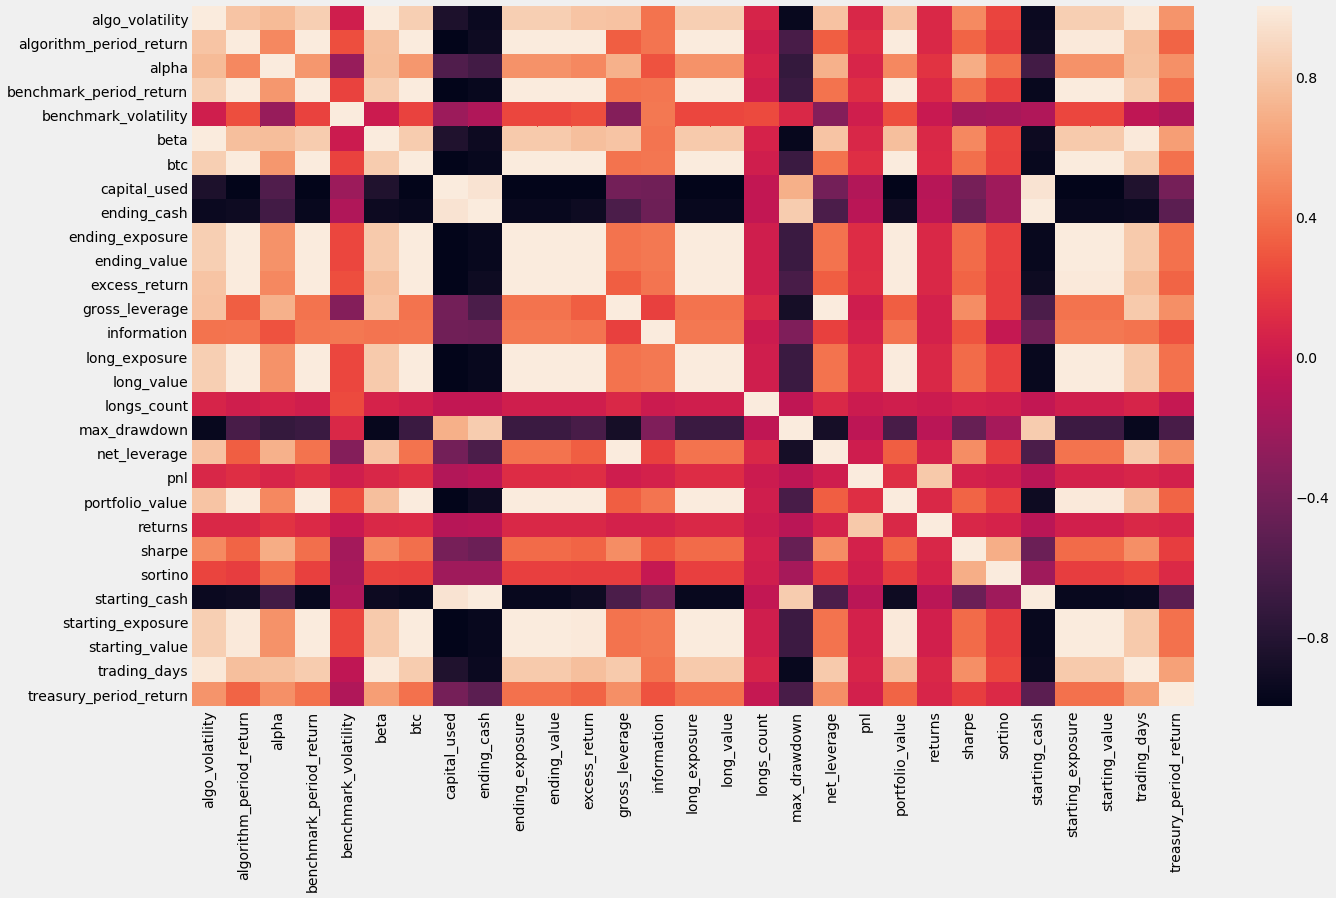

In [17]:
plt.rcParams['figure.figsize'] = (20,12)
sns.heatmap(buy_btc.corr())

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

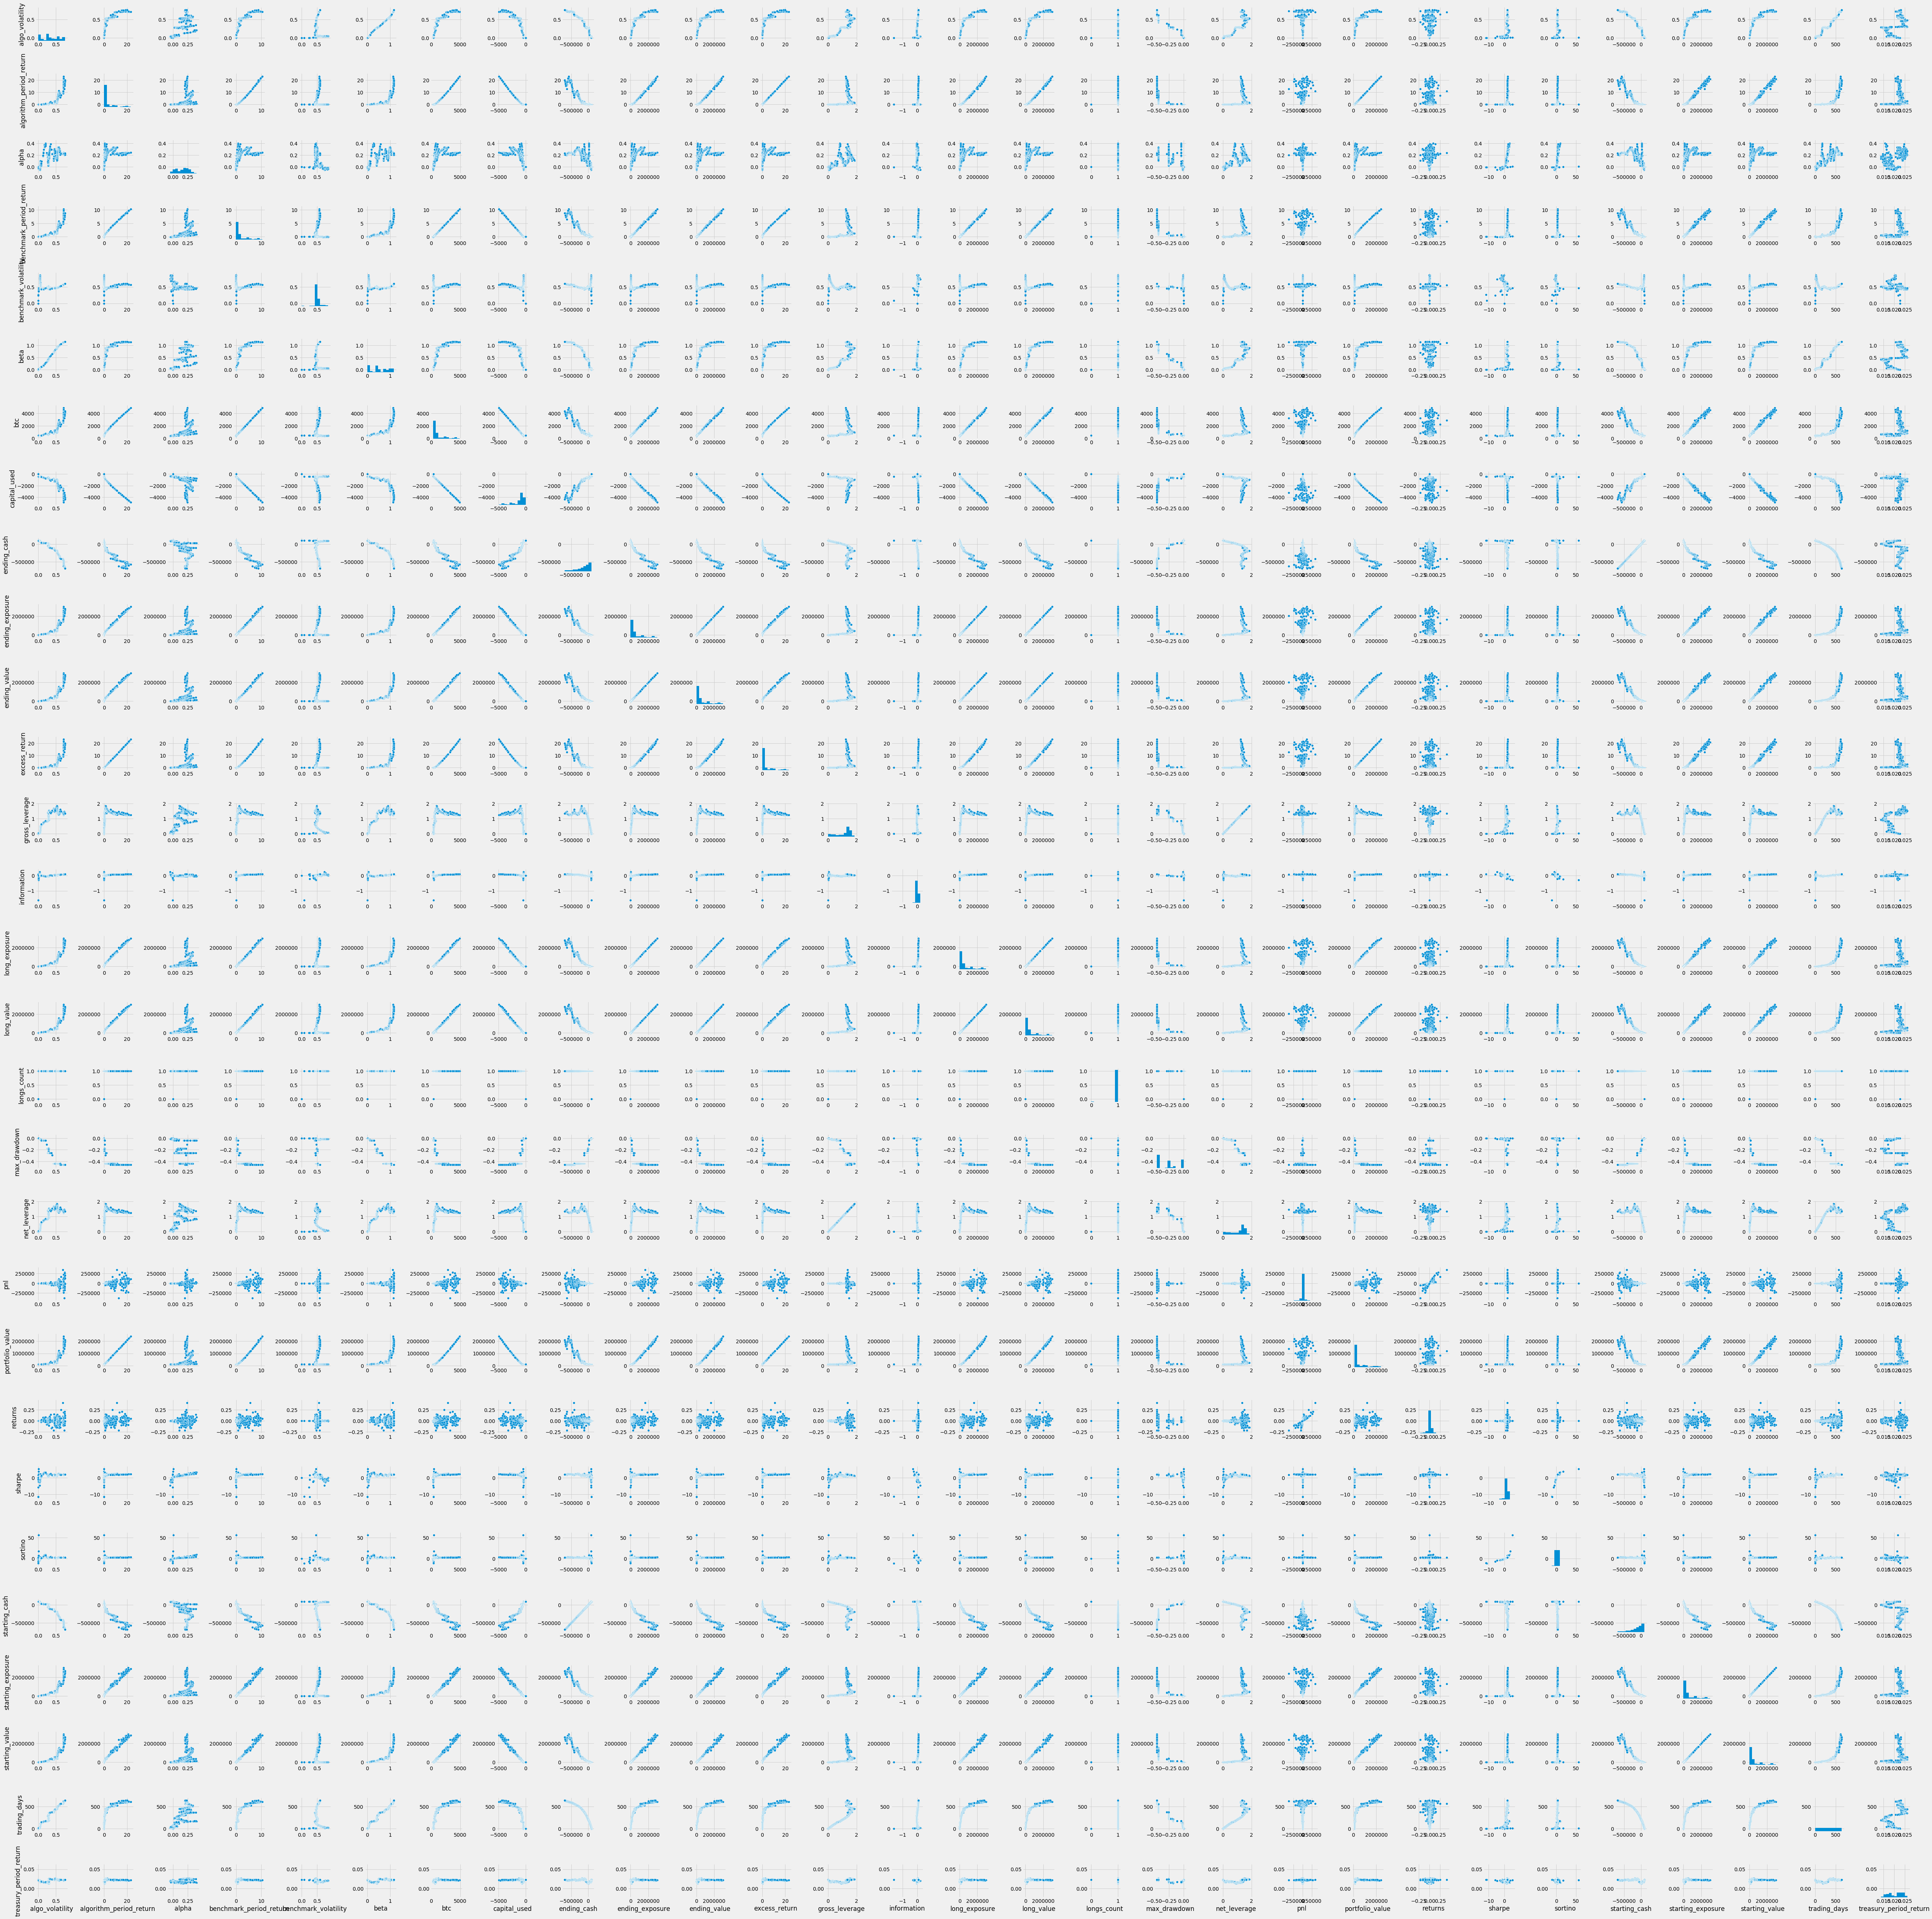

In [20]:
sns.pairplot(buy_btc)

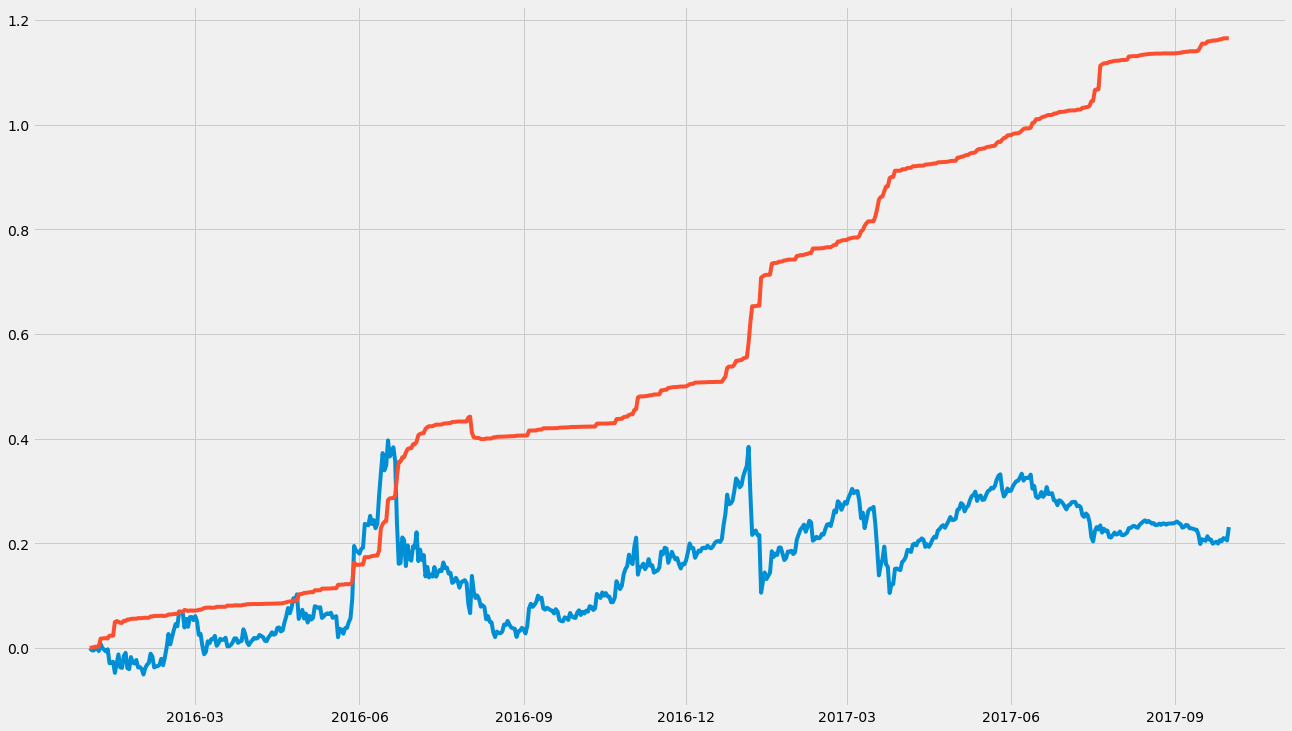

In [19]:
plt.plot(buy_btc['DateStamp'], buy_btc['alpha'])
plt.plot(buy_btc['DateStamp'], buy_btc['beta'])

In [21]:
from fbprophet import Prophet

In [37]:
ds = buy_btc['DateStamp'].to_frame()
y = buy_btc['alpha'].to_frame()
X= pd.merge(ds,y, left_index=True, right_index=True)
X.columns =['ds','y']
X.head()

ds         y
0 2016-01-01 23:59:00  0.000000
1 2016-01-02 23:59:00 -0.003744
2 2016-01-03 23:59:00 -0.004572
3 2016-01-04 23:59:00 -0.001326
4 2016-01-05 23:59:00 -0.001258

In [38]:
m = Prophet()

In [39]:
m.fit(X);

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50)

ds      yhat  yhat_lower  yhat_upper
954  2018-08-12 23:59:00  0.252449    0.167344    0.340193
955  2018-08-13 23:59:00  0.253811    0.166473    0.332330
956  2018-08-14 23:59:00  0.254393    0.172082    0.337191
957  2018-08-15 23:59:00  0.252403    0.168852    0.337155
958  2018-08-16 23:59:00  0.251367    0.162102    0.337128
959  2018-08-17 23:59:00  0.251368    0.158884    0.341597
960  2018-08-18 23:59:00  0.252691    0.171331    0.340897
961  2018-08-19 23:59:00  0.252505    0.169163    0.335178
962  2018-08-20 23:59:00  0.253866    0.166947    0.337455
963  2018-08-21 23:59:00  0.254449    0.164114    0.336657
964  2018-08-22 23:59:00  0.252459    0.168212    0.339457
965  2018-08-23 23:59:00  0.251423    0.163214    0.337376
966  2018-08-24 23:59:00  0.251424    0.165358    0.345108
967  2018-08-25 23:59:00  0.252747    0.166741    0.338650
968  2018-08-26 23:59:00  0.252561    0.170999    0.334005
969  2018-08-27 23:59:00  0.253922    0.168423    0.331068
970  2018-08-28 23:59:00  0.254505    0.167557    0.336749
971  2018-08-29 23:59:00  0.252515    0.162508    0.333766
972  2018-08-30 23:59:00  0.251478    0.166136    0.334576
973  2018-08-31 23:59:00  0.251480    0.165983    0.336039
974  2018-09-01 23:59:00  0.252802    0.168630    0.333239
975  2018-09-02 23:59:00  0.252617    0.169778    0.334863
976  2018-09-03 23:59:00  0.253978    0.172560    0.342139
977  2018-09-04 23:59:00  0.254560    0.166320    0.337375
978  2018-09-05 23:59:00  0.252571    0.166544    0.339105
979  2018-09-06 23:59:00  0.251534    0.164897    0.338487
980  2018-09-07 23:59:00  0.251536    0.162113    0.340901
981  2018-09-08 23:59:00  0.252858    0.161611    0.337016
982  2018-09-09 23:59:00  0.252672    0.159955    0.341309
983  2018-09-10 23:59:00  0.254034    0.166982    0.340640
984  2018-09-11 23:59:00  0.254616    0.173198    0.341749
985  2018-09-12 23:59:00  0.252626    0.157895    0.349587
986  2018-09-13 23:59:00  0.251590    0.170922    0.334260
987  2018-09-14 23:59:00  0.251591    0.163222    0.331268
988  2018-09-15 23:59:00  0.252914    0.167909    0.338064
989  2018-09-16 23:59:00  0.252728    0.165246    0.337870
990  2018-09-17 23:59:00  0.254090    0.171526    0.337376
991  2018-09-18 23:59:00  0.254672    0.165592    0.348418
992  2018-09-19 23:59:00  0.252682    0.176337    0.348341
993  2018-09-20 23:59:00  0.251646    0.161545    0.341279
994  2018-09-21 23:59:00  0.251647    0.161061    0.341154
995  2018-09-22 23:59:00  0.252970    0.164744    0.347827
996  2018-09-23 23:59:00  0.252784    0.165769    0.335626
997  2018-09-24 23:59:00  0.254145    0.160393    0.335493
998  2018-09-25 23:59:00  0.254728    0.169504    0.340865
999  2018-09-26 23:59:00  0.252738    0.154416    0.338265
1000 2018-09-27 23:59:00  0.251701    0.159054    0.339817
1001 2018-09-28 23:59:00  0.251703    0.162429    0.336786
1002 2018-09-29 23:59:00  0.253025    0.158653    0.337608
1003 2018-09-30 23:59:00  0.252840    0.167381    0.340095

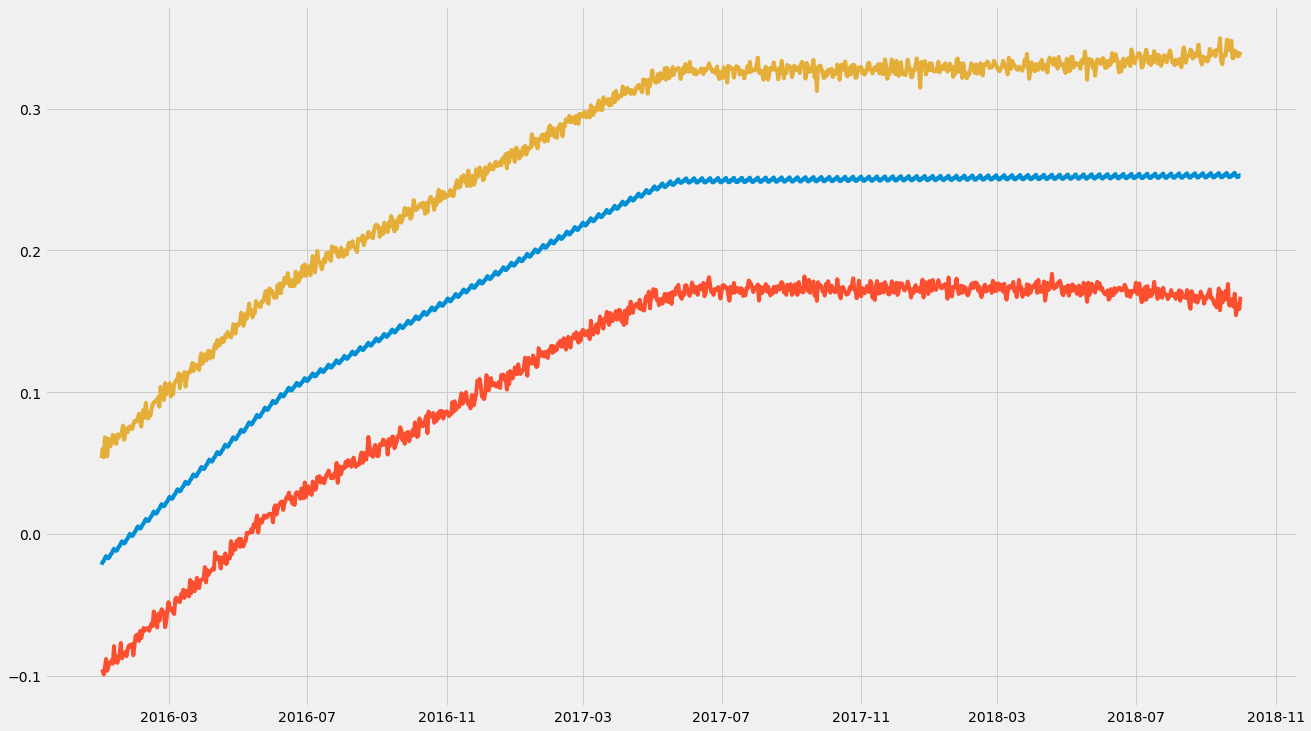

In [48]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.plot(forecast['ds'], forecast['yhat_lower'])
plt.plot(forecast['ds'], forecast['yhat_upper'])